In [1]:
import sys
import os
# sys.path.insert(1, 'C:/Users/Johan/Documents/FAU_Masterarbeit/Implementation')
sys.path.insert(1, 'C:/Users/jo77pihe/Documents/MasterThesis_OfSpinesAndDendrites')
from deconv import REGISTRY
# import seaborn
import matplotlib.pyplot as plt
# import pandas as pd
import pickle
import numpy as np
from data_augmentation import DataAugmenter
import yaml
from imagequalitymetrics import ImageQualityMetrics
from skimage import io
import pandas as pd
import seaborn as sns
import re

In [2]:
del ImageQualityMetrics

In [2]:
from imagequalitymetrics import ImageQualityMetrics

In [19]:
MAX_VAL = 12870
MIN_VAL = -2327
MAX_VAL_D = 0.0004595351955861729
MAX_VAL_AQ =33356

def _rescale(img):
    #original data
    img = (img - MIN_VAL)
    return img / (MAX_VAL -MIN_VAL)

def _rescale_mu_net(img):
    img=(img/MAX_VAL)
    return img

def _rescale_gt(img, max_val, min_val):
    #deconved data
    img = (img/np.max(img))
    img *= max_val
    return img

def _rescale_aq(img):
    #autoquant data
    img = (img/MAX_VAL_AQ)
    return img


def snr(a):
    a = np.asanyarray(a)
    m = a.mean()
    sd = a.std()
    return np.where(sd == 0, 0, m/sd)

In [2]:
with open('..\\config.yaml', "r") as stream:
    config=yaml.safe_load(stream)

In [3]:
config.keys()

dict_keys(['data_path', 'source_folder', 'target_folder', 'test_folder', 'result_path', 'psf', 'train', 'z_shape', 'xy_shape', 'n_patches', 'data_augmented_path', 'validation_split', 'epochs', 'batch_size', 'learning_rate'])

In [122]:
from pathlib import Path

def get_value_range(data_dir, rescale_mu = False, rescale_gt= False):
    files = []
    for path in Path(data_dir).rglob('*.tif'):
        files.append(path)
    # files = [f for f in os.listdir(data_dir) if f.endswith('.tif')]
    glob_max= -3
    glob_min = 4
    for f in files:
        X=io.imread(os.path.join(data_dir, f))
        if rescale_mu:
            X = _rescale_mu_net(X)
        if rescale_gt:
            X = _rescale_gt(X)
        if np.max(X)>glob_max:
            glob_max = np.max(X)
        if np.min(X)<glob_min:
            glob_min = np.min(X)
    print(glob_max)
    print(glob_min)

In [37]:
get_value_range('D:/jo77pihe/Registered/CARE_res/Predictions')

(36, 512, 512)
(48, 512, 512)
(80, 512, 512)
(52, 512, 512)
(54, 512, 512)
(44, 512, 512)
(56, 512, 512)
(35, 512, 512)
(53, 512, 512)
(32, 512, 512)
(33, 512, 512)
(39, 512, 512)
(63, 512, 512)
(51, 512, 512)
(40, 512, 512)
11625.103
-1305.7743


In [28]:
get_value_range('D:/jo77pihe/Registered/Mu_Net_res_3_levels50', rescale_mu=True)

(36, 512, 512)
(48, 512, 512)
(80, 512, 512)
(52, 512, 512)
(54, 512, 512)
(44, 512, 512)
(56, 512, 512)
(35, 512, 512)
(53, 512, 512)
(32, 512, 512)
(33, 512, 512)
(39, 512, 512)
(63, 512, 512)
(51, 512, 512)
(40, 512, 512)
12870.0
-2327.0


In [38]:
get_value_range('D:/jo77pihe/Registered/Deconved_AutoQuant')

(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)

(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)

(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)

(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)

(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)

(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)
(512, 512)

In [123]:
get_value_range('D:/jo77pihe/Registered/Deconved', rescale_gt = True)

12870.0
-2327.0


# CARE /Mu-Net

## Training

Epochs: 50 <br />
Learn rate (CARE/Mu-Net): 0.0004/0.0001 (ExponentialDecay(initial_learning_rate=self.learning_rate,
            decay_steps=5*num_batch_samples, decay_rate=0.5, staircase=True) <br />
Patchsize: (32,128,128) <br />
Batchsize: 4 <br />

### *Generate Training Data /Train Model*

Somehow GPU devices are not recognized in Jupyter but in PyCharm. Hence generating data and training through PyCharm.

## 1. Training Progress 

### 1.1 CARE

Populating the interactive namespace from numpy and matplotlib


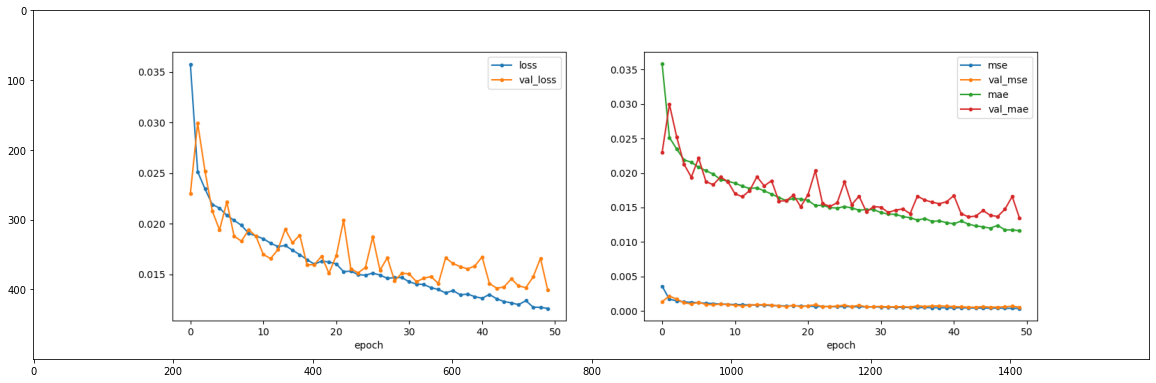

In [6]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('D:/jo77pihe/Registered/CARE_res/Figure_1.png')
plt.figure(figsize=(20, 10))

imgplot = plt.imshow(img)
plt.show()

### 1.2 Mu-Net

Load train history --> Loss and plot:
With 3, 2,1, 0 additional Levels

In [39]:
f_level_3 = 'D:/jo77pihe/Registered/Mu_Net_res_3_levels50'
f_level_2 = 'D:/jo77pihe/Registered/Mu_Net_res_2_levels50'
f_level_1 = 'D:/jo77pihe/Registered/Mu_Net_res_1_levels50'
f_level_0 = 'D:/jo77pihe/Registered/Mu_Net_res_0_levels50'
f_levels = [f_level_3, f_level_2, f_level_1, f_level_0]

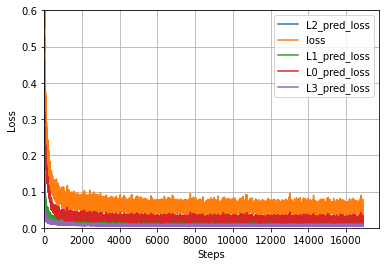

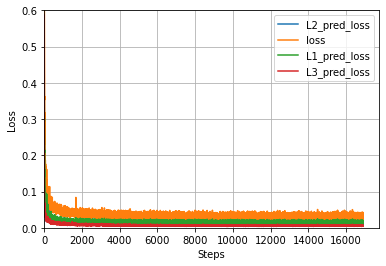

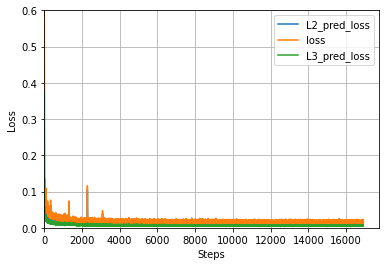

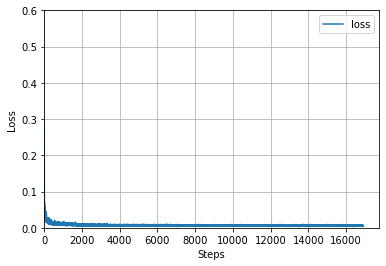

In [5]:
for f in f_levels:
    with open(os.path.join(f,'history_mu_net.pkl'), 'rb') as file:
        x = pickle.load(file)
    for k in x.keys():
        xp = np.arange(1,len(x[k])+1)
        plt.plot(xp, x[k])
    plt.legend(x.keys())
    plt.xlabel('Steps')
    plt.ylabel('Loss')
    plt.grid()
    plt.xlim(0,)
    plt.ylim(0, 0.6)
    plt.show(block=False)

## 2. Examplary results

Alessandro_520_ArcCreERT2_Thy1GFP_Ai9_TRAP_2019-08-31_A2.tif


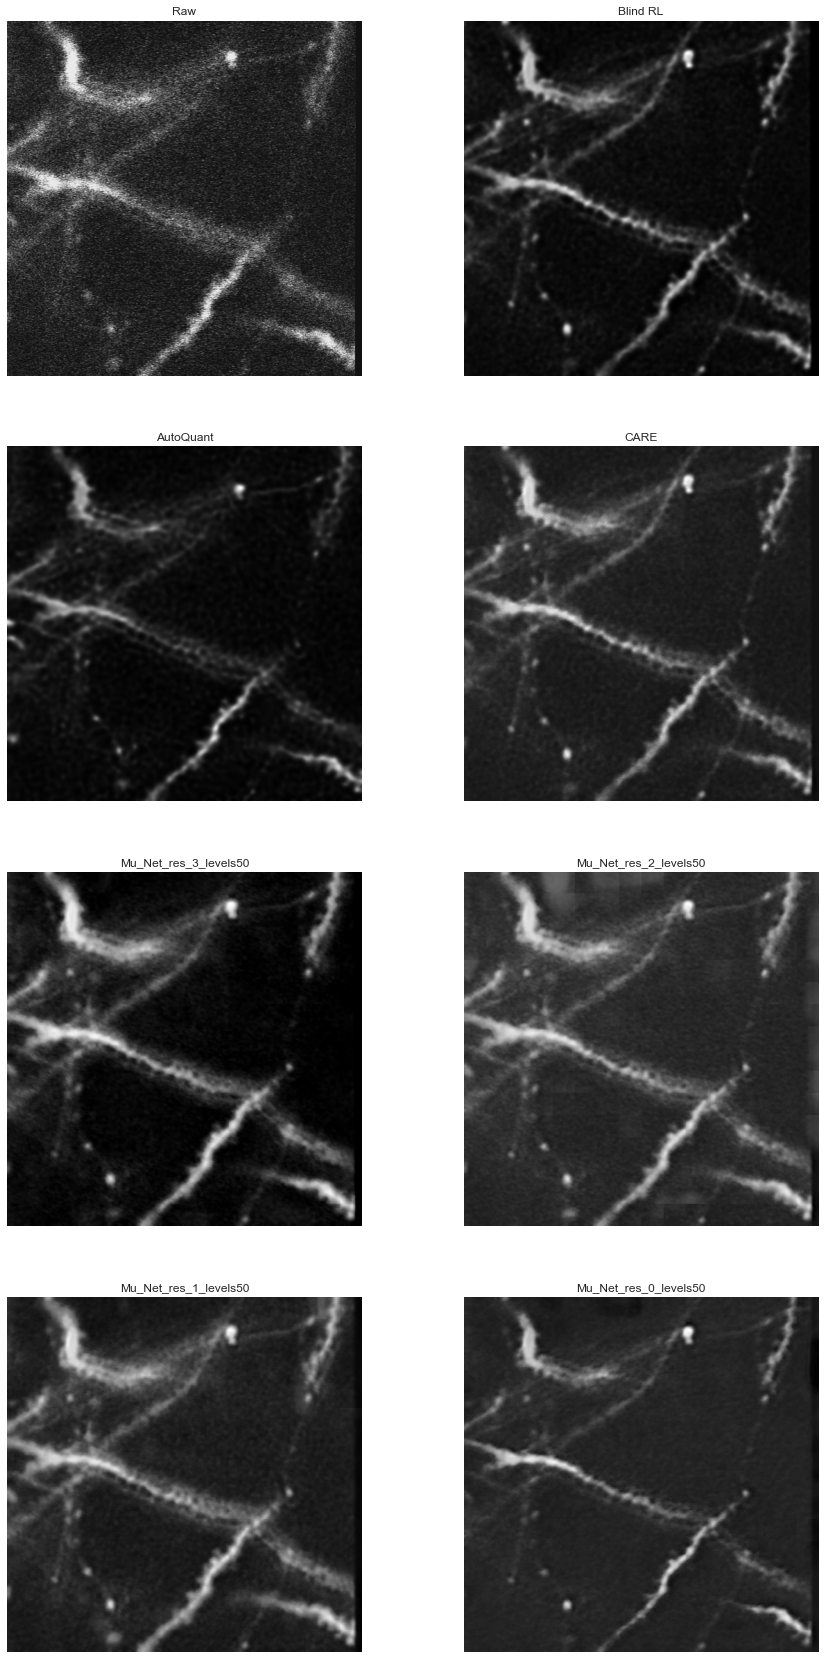

In [41]:
img1 = 'Alessandro_520_ArcCreERT2_Thy1GFP_Ai9_TRAP_2019-08-31_A2.tif'
plane = 11
blind_rl_res = 'D:/jo77pihe/Registered/Deconved'
autoquant_res='D:/jo77pihe/Registered/Deconved_AutoQuant_R2'
care_res = 'D:/jo77pihe/Registered/CARE_res/Predictions'
raw = "D:/jo77pihe/Registered/Raw"


print("\033[1m" + img1 + "\033[0m")
fig=plt.figure()
fig.set_figheight(30)
fig.set_figwidth(15)

#Raw
f = io.imread(os.path.join(raw, img1))
ax = fig.add_subplot(4, 2, 1)
ax.imshow(f[plane, :, :],cmap='gray')
ax.set_title('Raw')
ax.axis('off')

#Blind RL img
f = io.imread(os.path.join(blind_rl_res, img1))
ax = fig.add_subplot(4, 2, 2)
ax.imshow(f[plane, :, :],cmap='gray')
ax.set_title('Blind RL')
ax.axis('off')
              
# AUtoQuant Img
f = io.imread(os.path.join(autoquant_res, img1))
ax = fig.add_subplot(4, 2, 3)
ax.imshow(f[plane, :, :],cmap='gray')
ax.set_title('AutoQuant')
ax.axis('off')

# CARE Img
f = io.imread(os.path.join(care_res, img1))
ax = fig.add_subplot(4, 2, 4)
ax.imshow(f[plane, :, :],cmap='gray')
ax.set_title('CARE')
ax.axis('off')


for (i,l) in enumerate(f_levels):
    f = io.imread(os.path.join(l, img1))
    ax = fig.add_subplot(4, 2, i+5)
    ax.imshow(f[plane, :, :], cmap='gray')
    n = l.split('/')
    ax.set_title(n[-1])
    ax.axis('off')

plt.savefig('visual_comp_care_mu.png')
plt.show()


## 3. Metrics

### 3.1 Obtain results

In [20]:
from skimage.metrics import structural_similarity as sk_ssim
from skimage.metrics import peak_signal_noise_ratio as sk_psnr
# from skvideo.measure import niqe as sk_niqe
# import imquality.brisque as brisque
# Doku: https://sewar.readthedocs.io/en/latest/
import sewar
import numpy as np
# import matlab.engine

MAX_VAL = 12870
MIN_VAL = -2327

class ImageQualityMetrics:
    def __init__(self):
        pass

    def compute_all(self, img, gt_img=None):
        res = {}
        if gt_img is not None:
            res['mse'] = self.mse(img,gt_img)
            res['ssim'] = self.ssim(img,gt_img)
            res['msssim'] = self.ssim(img, gt_img)
            res['psnr'] = self.psnr(img, gt_img)
            # res['vif'] = self.vifp(img, gt_img)
            # res['uqi'] = self.uqi(img, gt_img)

        res['niqe'] = self.niqe(img)
        res['brisque'] = self.brisque(img)
        res['snr'] = self.snr(img)
        return res

    def mse(self, img, gt_img):
        # img = self._rescale(img)
        # gt_img = self._rescale(gt_img)
        val = np.sum((gt_img.astype("float") - img.astype("float")) ** 2)
        val /= float(gt_img.shape[0] * gt_img.shape[1])
        return val

    def ssim(self, img, gt_img):
        # img = self._rescale(img)
        # gt_img = self._rescale(gt_img)
        val = sk_ssim(img, gt_img)
        return val

    def mssim(self, img, gt_img):
        # img = self._rescale(img)
        # gt_img = self._rescale(gt_img)
        return sewar.msssim(gt_img, img)

    def niqe(self, img):
        # eng = matlab.engine.start_matlab()
        # eng.niqe(matlab.double(img.tolist()))
        # eng.quit()
        return 0 #sk_niqe(img)

    def brisque(self, img):
        img = self._rescale(img)
        return 0 #brisque.score(img)

    def psnr(self, img, gt_img, data_range = 1):
        # img = self._rescale(img)
        # gt_img = self._rescale(gt_img)
        if img.min() <0:
            img -= MIN_VAL
        if gt_img.min()<0:
            gt_img -=MIN_VAL
        return sk_psnr(gt_img, img,data_range =data_range)

    def snr(self, img):
        m = img.mean()
        sd = img.std()
        return  m / sd if sd != 0 else np.nan

    def _rescale(self,img):
        img = (img - MIN_VAL)
        return img/(MAX_VAL -MIN_VAL)

In [21]:
metrics = ImageQualityMetrics()

In [22]:
files = [f for f in os.listdir('D:/jo77pihe/Registered/Raw_32/Test') if f.endswith('.tif')]
gt_path='D:/jo77pihe/Registered/Deconved'
auto_qu_path = 'D:/jo77pihe/Registered/Deconved_AutoQuant_R2'
care_path = 'D:/jo77pihe/Registered/CARE_res/Predictions'
mu_0 = 'D:/jo77pihe/Registered/Mu_Net_res_0_levels50'
mu_1 = 'D:/jo77pihe/Registered/Mu_Net_res_1_levels50'
mu_2 = 'D:/jo77pihe/Registered/Mu_Net_res_2_levels50'
mu_3 = 'D:/jo77pihe/Registered/Mu_Net_res_3_levels50'

pred_list = [auto_qu_path, care_path, mu_0,mu_1,mu_2,mu_3]
# shape[1] -> Care Img, Mu-Net, Autoquant Img, shape[2] -> Metrics: MSE, SSIM, MSSIM, PSNR, NIQE,BRISQUE, SNR
res=np.zeros((len(files),6, 7))
for (i,f) in enumerate(files):
    gt_img=np.float32(io.imread(os.path.join(gt_path, f)))
    for (j, p) in enumerate(pred_list):
        predicted = np.float32(io.imread(os.path.join(p, f)))
        if j>=2:
            predicted=_rescale_mu_net(predicted)
        if j ==1:
            predicted = _rescale(predicted)
        if j ==0:
            predicted = _rescale_aq(predicted)
        print(np.min(predicted), np.max(predicted))
        gt_img = _rescale_gt(gt_img,max_val=np.max(predicted), min_val=np.min(predicted))
        print('GT:' + str(np.min(gt_img))+', ' +str(np.max(gt_img)))

        m=metrics.compute_all(predicted,gt_img)
        res[i,j,:] = np.array([m[y] for y in m.keys()])
    

2.6231952e-05 0.41941
GT:9.344412e-13, 0.41941
0.101986535 0.8578409
GT:1.9112609e-12, 0.8578409
0.2572405 1.0
GT:2.22799e-12, 1.0
0.068010926 0.9997526
GT:2.2274387e-12, 0.9997526
0.038431525 1.0
GT:2.22799e-12, 1.0
0.0 0.9913433
GT:2.2087028e-12, 0.9913433
9.693439e-06 0.47015545
GT:5.7847632e-27, 0.47015545
0.06794803 0.8965867
GT:1.1031547e-26, 0.8965867
0.29725224 1.0
GT:1.23039375e-26, 1.0
0.013222308 1.0
GT:1.23039375e-26, 1.0
0.0 1.0
GT:1.23039375e-26, 1.0
0.0 1.0
GT:1.23039375e-26, 1.0
1.9442255e-07 0.9709646
GT:0.0, 0.9709646
0.07444409 0.91808265
GT:0.0, 0.91808265
0.27378428 1.0
GT:0.0, 1.0
0.07285157 1.0
GT:0.0, 1.0
0.00047039986 1.0
GT:0.0, 1.0
0.0 0.99858797
GT:0.0, 0.99858797
1.6047665e-06 0.54466826
GT:4.5925738e-18, 0.54466826
0.11098536 0.84191227
GT:7.098897e-18, 0.84191227
0.23537248 1.0
GT:8.431873e-18, 1.0
0.11427376 1.0
GT:8.431873e-18, 1.0
0.028670847 1.0
GT:8.431873e-18, 1.0
0.0 0.99602646
GT:8.398369e-18, 0.99602646
6.349856e-07 0.5542966
GT:9.122748e-25, 0.5

### 3.2 PSNR

In [34]:
psnr_res = res[:,:,3]
psnr_res = psnr_res.flatten('F')
df = pd.DataFrame(psnr_res,columns=['PSNR'])
lab = ['AutoQuant']*len(files)
lab=lab+(['CARE']*len(files))
lab=lab+(['Mu-Net (0 levels)']*len(files))
lab=lab+(['Mu-Net (1 levels)']*len(files))
lab=lab+(['Mu-Net (2 levels)']*len(files))
lab=lab+(['Mu-Net (3 levels)']*len(files))

df['Prediction'] = lab


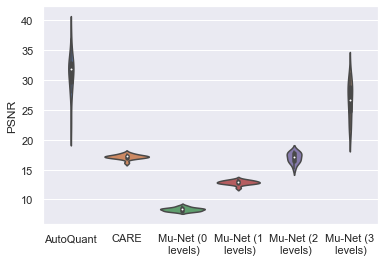

In [35]:
sns.set()
ax = sns.violinplot(x="Prediction", y="PSNR", data=df)
plt.xlabel('')

xlabels = ax.get_xticklabels()
xlabels =[n.get_text() for n in xlabels]
xlabels_new = [re.sub("(.{9})", "\\1\n", label, 0, re.DOTALL) for label in xlabels]
ax.set_xticklabels(xlabels_new)
plt.savefig('psnr_violin_care_mu.svg')

### 3.3 SSIM

In [25]:
ssim = res[:,:,1]
ssim = ssim.flatten('F')
df = pd.DataFrame(ssim,columns=['SSIM'])
lab = ['AutoQuant']*len(files)
lab=lab+(['CARE']*len(files))
lab=lab+(['Mu-Net   (0 lvls)']*len(files))
lab=lab+(['Mu-Net   (1 lvls)']*len(files))
lab=lab+(['Mu-Net   (2 lvls)']*len(files))
lab=lab+(['Mu-Net   (3 lvls)']*len(files))

df['Prediction'] = lab

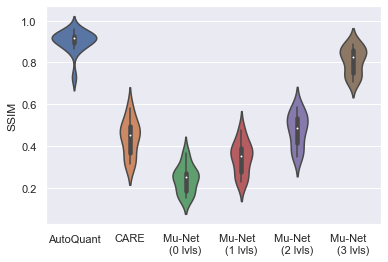

In [26]:
sns.set()
ax = sns.violinplot(x="Prediction", y="SSIM", data=df)
plt.xlabel('')

xlabels = ax.get_xticklabels()
xlabels =[n.get_text() for n in xlabels]
xlabels_new = [re.sub("(.{9})", "\\1\n", label, 0, re.DOTALL) for label in xlabels]
ax.set_xticklabels(xlabels_new)
plt.savefig('ssim_violin_care_mu.svg')

### 3.4 MSSIM

In [27]:
mssim = res[:,:,2]
mssim = mssim.flatten('F')
df = pd.DataFrame(mssim,columns=['MSSIM'])
lab = ['AutoQuant']*len(files)
lab=lab+(['CARE']*len(files))
lab=lab+(['Mu-Net   (0 lvls)']*len(files))
lab=lab+(['Mu-Net   (1 lvls)']*len(files))
lab=lab+(['Mu-Net   (2 lvls)']*len(files))
lab=lab+(['Mu-Net   (3 lvls)']*len(files))

df['Prediction'] = lab

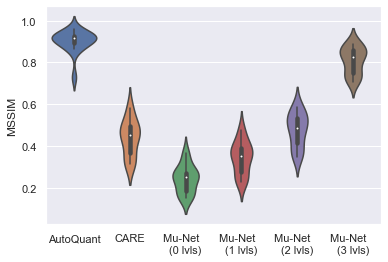

In [28]:
sns.set()
ax = sns.violinplot(x="Prediction", y="MSSIM", data=df)
plt.xlabel('')

xlabels = ax.get_xticklabels()
xlabels =[n.get_text() for n in xlabels]
xlabels_new = [re.sub("(.{9})", "\\1\n", label, 0, re.DOTALL) for label in xlabels]
ax.set_xticklabels(xlabels_new)
plt.savefig('mssim_violin_care_mu.svg')

In [29]:
p = res[:,:,1]
p[:,5]

array([0.76676448, 0.7200606 , 0.82770309, 0.70768316, 0.73297388,
       0.87973332, 0.88947199, 0.8873436 , 0.82490404, 0.85407139,
       0.83593888, 0.86513066, 0.78326704, 0.84169831, 0.73216674])

### 3.5 MSE

In [30]:
mse = res[:,:,0]
mse = mse.flatten('F')
df = pd.DataFrame(mse,columns=['MSE'])
lab = ['AutoQuant']*len(files)
lab=lab+(['CARE']*len(files))
lab=lab+(['Mu-Net   (0 lvls)']*len(files))
lab=lab+(['Mu-Net   (1 lvls)']*len(files))
lab=lab+(['Mu-Net   (2 lvls)']*len(files))
lab=lab+(['Mu-Net   (3 lvls)']*len(files))

df['Prediction'] = lab

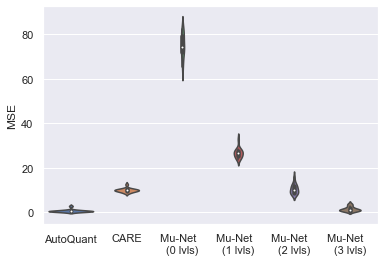

In [31]:
sns.set()
ax = sns.violinplot(x="Prediction", y="MSE", data=df)
plt.xlabel('')

xlabels = ax.get_xticklabels()
xlabels =[n.get_text() for n in xlabels]
xlabels_new = [re.sub("(.{9})", "\\1\n", label, 0, re.DOTALL) for label in xlabels]
ax.set_xticklabels(xlabels_new)
plt.savefig('mse_violin_care_mu.svg')

### 3.6 SNR

In [36]:
mse = res[:,:,6]
mse = mse.flatten('F')
df = pd.DataFrame(mse,columns=['SNR'])
lab = ['AutoQuant']*len(files)
lab=lab+(['CARE']*len(files))
lab=lab+(['Mu-Net   (0 lvls)']*len(files))
lab=lab+(['Mu-Net   (1 lvls)']*len(files))
lab=lab+(['Mu-Net   (2 lvls)']*len(files))
lab=lab+(['Mu-Net   (3 lvls)']*len(files))

df['Prediction'] = lab

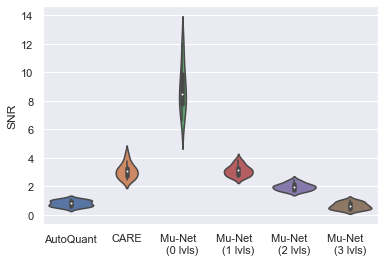

In [42]:
sns.set()
ax = sns.violinplot(x="Prediction", y="SNR", data=df)
plt.xlabel('')

xlabels = ax.get_xticklabels()
xlabels =[n.get_text() for n in xlabels]
xlabels_new = [re.sub("(.{9})", "\\1\n", label, 0, re.DOTALL) for label in xlabels]
ax.set_xticklabels(xlabels_new)
plt.savefig('snr_violin_care_mu.svg')

### *Examples*